## 相关设置

In [13]:
from PIL import Image
from IPython.display import Image as IMG #为了不混淆，重命名

## 建库建表

In [7]:
import pymysql

# 连接本地数据库
conn = pymysql.connect(host='localhost',
                      user='root',
                      passwd='xjyxjy0723',
                      charset='utf8')

# 创建一个可以执行SQL语句的游标对象
cur = conn.cursor()

# 创建数据库
cur.execute("create database music")

# 使用数据库
cur.execute("use music")

# 创建表
sql_create = """
                create table hcy( 
                song CHAR(100) NOT NULL,
                album CHAR(100) NOT NULL
                )
"""

try:
    cur.execute(sql_create)
except Exception as e:
    print(e)
    conn.rollback()
    print('数据库创建操作错误回滚')

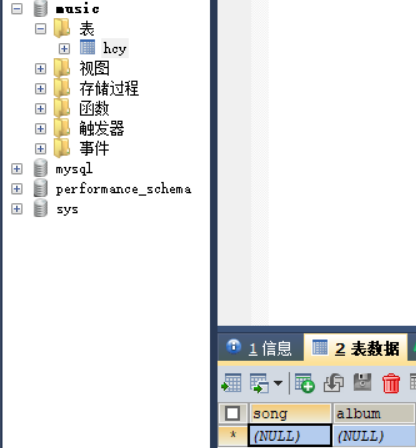

In [15]:
path1 = 'pics/create.png'
display(Image.open(path1))

## 增删查改

In [8]:
# 增：insert into,id是主键自增
sql_insert = """
                INSERT INTO hcy(song, album)
                VALUES(%s, %s)
"""

data = [
    ("疯人院", "新世界NEW WORLD"),
    ("拆弹专家", "卡西莫多的礼物"),
    ("我管你", "异类")
]

try:
    # 批量插入
    cur.executemany(sql_insert, data)
    # 提交执行
    conn.commit()
except Exception as e:
    print(e)
    conn.rollback()
    print('数据库插入操作错误回滚')

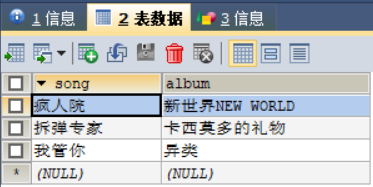

In [16]:
path2 = 'pics/insert.png'
display(Image.open(path2))

In [9]:
# 查询：select
sql_select = "SELECT * FROM hcy WHERE album = '卡西莫多的礼物'"

try:
    # 执行SQL语句
    cur.execute(sql_select)
    # 获取所有记录列表
    results = cur.fetchall()
    # print(results)
    for row in results:
        song = row[0]
        album = row[1]
        # 打印结果
        print ("song：《%s》，album：《%s》" % (song, album))
except Exception as e:
    print(e)
    print ("Error: unable to fetch data")

song：《拆弹专家》，album：《卡西莫多的礼物》


In [10]:
# 改：UPDATE
sql_update = "UPDATE hcy SET song = '七重人格' WHERE album = '%s'" % ('新世界NEW WORLD')

try:
   # 执行SQL语句
   cur.execute(sql_update)
   # 提交到数据库执行
   conn.commit()
except Exception as e:
    print(e)
    conn.rollback()
    print('数据库更新操作错误回滚')

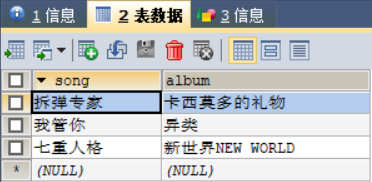

In [17]:
path3 = 'pics/update.png'
display(Image.open(path3))

In [11]:
# 删：DELETE
sql_delete = "DELETE FROM hcy WHERE song = '我管你'"

try:
   # 执行SQL语句
   cur.execute(sql_delete)
   # 提交修改
   conn.commit()
except Exception as e:
    print(e)
    conn.rollback()
    print('数据库删除操作错误回滚')

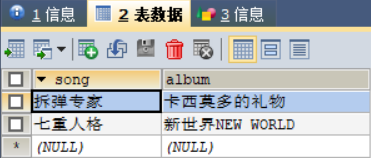

In [18]:
path4 = 'pics/delete.png'
display(Image.open(path4))

## 爬取QQ音乐的歌曲信息并存入数据库

In [ ]:
import csv
import pymysql
import requests

# 连接MySQL数据库（注意：charset参数是utf8而不是utf-8）
conn = pymysql.connect(host='localhost', user='root', password='xjyxjy0723', db='music', charset='utf8')

# 创建游标对象
cur = conn.cursor()

url = 'https://c.y.qq.com/soso/fcgi-bin/client_search_cp'
name = '华晨宇'
page = 2

for x in range(page):
    params = {
    'ct':'24',
    'qqmusic_ver': '1298',
    'new_json':'1',
    'remoteplace':'sizer.yqq.song_next',
    'searchid':'64405487069162918',
    't':'0',
    'aggr':'1',
    'cr':'1',
    'catZhida':'1',
    'lossless':'0',
    'flag_qc':'0',
    'p':str(x+1),
    'n':'20',
    'w':name,
    'g_tk':'5381',
    'loginUin':'0',
    'hostUin':'0',
    'format':'json',
    'inCharset':'utf8',
    'outCharset':'utf-8',
    'notice':'0',
    'platform':'yqq.json',
    'needNewCode':'0'    
    }
    
    res = requests.get(url, params=params)
    json = res.json()
    lis = json['data']['song']['list']
    
    data = []
    for music in lis:
        song_name = music['name'] # 以song_name为键，查找歌曲名，把歌曲名赋值给name
        album = music['album']['name'] # 查找专辑名，把专辑名赋给album
        data.append([song_name,album])

    for each in data:
        i = tuple(each)
        sql = "INSERT INTO hcy VALUES" + str(i)
        cur.execute(sql) #执行SQL语句
    
    conn.commit() # 提交数据
cur.close() # 关闭游标
conn.close() # 关闭数据库
print("成功存入数据库")

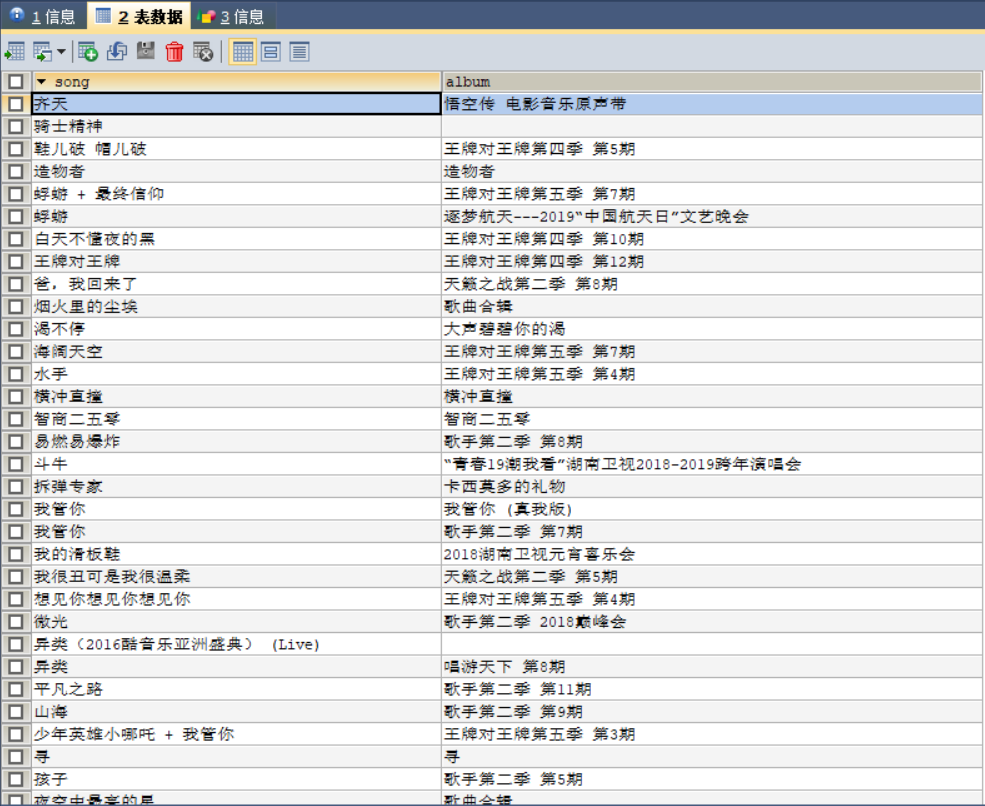

In [19]:
path5 = 'pics/crawl.png'
display(Image.open(path5))

## 排序

In [12]:
sql_order = "SELECT * FROM hcy ORDER BY album"

try:
   # 执行SQL语句
   cur.execute(sql_order)
except Exception as e:
    print(e)
    conn.rollback()
    print('数据库排序操作错误回滚')

result = cur.fetchall()

for x in result:
    print(x)

('骑士精神', '')
('异类（2016酷音乐亚洲盛典） (Live)', '')
('斗牛', '“青春19潮我看”湖南卫视2018-2019跨年演唱会')
('国王与乞丐', '2016安徽卫视国剧盛典')
('我的滑板鞋', '2018湖南卫视元宵喜乐会')
('Here We Are', 'Here We Are')
('你要相信这不是最后一天', '你要相信这不是最后一天')
('拆弹专家', '卡西莫多的礼物')
('异类', '唱游天下 第8期')
('渴不停', '大声碧碧你的渴')
('我很丑可是我很温柔', '天籁之战第二季 第5期')
('代号魂斗罗', '天籁之战第二季 第6期')
('爸，我回来了', '天籁之战第二季 第8期')
('一人饮酒醉', '天籁之战第二季 第9期')
('寻', '寻')
('齐天', '悟空传 电影音乐原声带')
('我管你', '我管你 (真我版)')
('七重人格', '新世界NEW WORLD')
('智商二五零', '智商二五零')
('横冲直撞', '横冲直撞')
('微光', '歌手第二季 2018巅峰会')
('光年之外', '歌手第二季 歌王之战')
('假行僧', '歌手第二季 第10期')
('平凡之路', '歌手第二季 第11期')
('孩子', '歌手第二季 第5期')
('双截棍', '歌手第二季 第6期')
('我管你', '歌手第二季 第7期')
('易燃易爆炸', '歌手第二季 第8期')
('山海', '歌手第二季 第9期')
('烟火里的尘埃', '歌曲合辑')
('夜空中最亮的星', '歌曲合辑')
('少年英雄小哪吒 + 我管你', '王牌对王牌第五季 第3期')
('水手', '王牌对王牌第五季 第4期')
('想见你想见你想见你', '王牌对王牌第五季 第4期')
('咱们屯里的人', '王牌对王牌第五季 第5期')
('海阔天空', '王牌对王牌第五季 第7期')
('蜉蝣 + 最终信仰', '王牌对王牌第五季 第7期')
('白天不懂夜的黑', '王牌对王牌第四季 第10期')
('王牌对王牌', '王牌对王牌第四季 第12期')
('鞋儿破 帽儿破', '王牌对王牌第四季 第5期')
('蜉蝣', '逐梦航天---2019“中国航天日”文艺晚会')
('造